In [1]:
def analysis_null_values(data,firstCol,secondCol):
        
    uniqueFirstArray=data[firstCol].unique().tolist()
    c1=uniqueFirstArray
    nullCounter = data[secondCol].isnull().groupby(data[firstCol]).sum().astype(int).reset_index(name='count')
    c2=[]
    c3=[]
    #data.Translated_Review.isnull().groupby(data['App']).sum().astype(int).reset_index(name='count')
    for element in uniqueFirstArray:
        totalCounts=data[data[firstCol]==element].count()[0]
        for index in range(nullCounter.shape[0]):
            if(nullCounter[firstCol].iloc[index]==element):
                value=round((nullCounter['count'].iloc[index]/totalCounts)*100,2)
                c2.append(value)
                if(value>70):
                    c3.append(True)
                else:
                    c3.append(False)
                break;
    assert len(c1)==len(c2)
    data = {firstCol:c1, 'percentage of null values':c2,'unpopular app': c3} 
    # Create DataFrame 
    updateValue = pd.DataFrame(data) 
    updateValue.to_csv("google-play-store-apps/analysis_null_reviews.csv")
    return updateValue
    
def displayBarChart(xArray,yArray,title):

    objects=tuple(xArray)
    performance=yArray
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('count')
    plt.title(title)
    plt.show()
    print(objects,performance)



def displayBarChartOfCountColumn(data,colName):
    #newData=data
    #da
    uniqueValuesArray=data[colName].unique().tolist()
    objects=tuple(uniqueValuesArray)
    performance=[]
    for element in uniqueValuesArray:
        if(not (nan in [element])):
            count=data[data[colName]==element].count()[0]
        else:
            count=data[colName].isnull().sum()
        
        performance.append(count)

    y_pos = np.arange(len(objects))
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('values')
    plt.title(colName+" attributes")
    
    plt.show()
    print(objects,performance)
    
    

def getIndex(value,array):
    
    for i in range(len(array)):
        if(array[i]==value):
            return i
    return -1
        
         


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import nan

data = pd.read_csv("google-play-store-apps/googleplaystore_user_reviews.csv") 
data.head()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [3]:
data.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [4]:
# first step we did was to calculate the number of missing values in the dataset.
missing_values_count_reviews = data.isnull().sum()
totalRows=data.shape[0]
totalColumns=data.shape[1]
missing_values_count_reviews

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [5]:
#Then we calculated the percentage of missing values from the whole table by 
# dividing the number of missing cell by the number of the cells in the dataset. 
# Then we calculated the number of rows with less than 4 missing values which turns out to be 5.

total_cells_review = np.product(data.shape) 
total_missing_values = missing_values_count_reviews.sum()
totalMissingValuesPer=(total_missing_values/total_cells_review)*100
print("missing data cells are",total_missing_values,"out of ",total_cells_review,"and percentage is",round(totalMissingValuesPer,2))

counter=0
anotherCounter=0
exceptionalNullArray=[]
for index in range(totalRows):
    countNullValuesEachRow=data.iloc[index,1:].isnull().sum()
    if(countNullValuesEachRow==4):
        counter+=1
    elif(countNullValuesEachRow<4 and countNullValuesEachRow>0):
        anotherCounter+=1
        exceptionalNullArray.append(index)
totalRowsNull=round((counter/totalRows)*100,2)


print("total number of rows that has four missing values",counter,"out of",totalRows,"and percentage is",totalRowsNull)    
print("total number of rows that has less than four missing values",anotherCounter)
# The above print statement shows that about 40% of users did not provide a review about applications that they used.


missing data cells are 107457 out of  321475 and percentage is 33.43
total number of rows that has four missing values 26863 out of 64295 and percentage is 41.78
total number of rows that has less than four missing values 5


In [6]:
#We deduced from this that most of the rows that has a missing value probably has 
#missing values in all other columns. And by calculating the percentage of those cells with 4 missing values, 
#we get that it is 40% of the whole data which 
#means that 40% of the user base didn’t write a review about the application.

#Also we found that the 5 rows with missing values more than 4 are wrong rows because they have a ‘sentiment’ 
#value while there is 
#no review provided which doesn’t make sense as the ‘sentiment’ value depends on the review.

print("the following records are not correct as Sentiment is provided without providing a review")
print(exceptionalNullArray)
for index in exceptionalNullArray:
    print(data.iloc[index])

the following records are not correct as Sentiment is provided without providing a review
[268, 15048, 22092, 31623, 52500]
App                          11st
Translated_Review             NaN
Sentiment                 Neutral
Sentiment_Polarity              0
Sentiment_Subjectivity          0
Name: 268, dtype: object
App                       Birds Sounds Ringtones & Wallpapers
Translated_Review                                         NaN
Sentiment                                             Neutral
Sentiment_Polarity                                          0
Sentiment_Subjectivity                                      0
Name: 15048, dtype: object
App                       Calorie Counter - MyFitnessPal
Translated_Review                                    NaN
Sentiment                                        Neutral
Sentiment_Polarity                                     0
Sentiment_Subjectivity                                 0
Name: 22092, dtype: object
App                       DC Com

In [7]:
#After that, we tried to get the percentage of missing reviews for each app from the whole reviews for that app. 
#We found that unpopular apps usually have higher number of missing reviews.
analysis_null_values(data,'App','Translated_Review')

,App,percentage of null values,unpopular app
0,10 Best Foods for You,3.00,False
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.00,False
2,11st,2.50,False
3,1800 Contacts - Lens Store,0.00,False
4,1LINE – One Line with One Touch,5.00,False
5,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,20.00,False
6,21-Day Meditation Experience,0.00,False
7,"2Date Dating App, Love and matching",5.00,False
8,2GIS: directory & navigator,0.00,False
9,2RedBeans,2.50,False


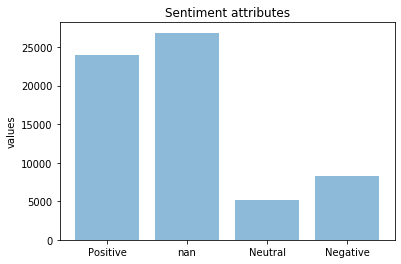

('Positive', nan, 'Neutral', 'Negative') [23998, 26863, 5163, 8271]
after removing null values



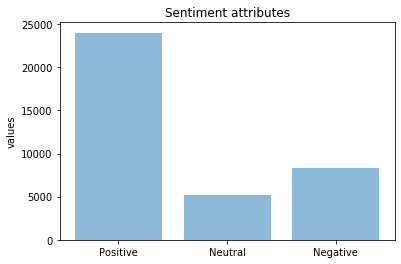

('Positive', 'Neutral', 'Negative') [23998, 5158, 8271]


In [8]:
#visualization of the sentiment attribute across the dataset

newData=pd.read_csv("google-play-store-apps/googleplaystore_user_reviews.csv") 
# delete null records
newData.dropna(inplace = True) 
newData.to_csv("google-play-store-apps/userReviewsNoMissingValues.csv")
displayBarChartOfCountColumn(data,'Sentiment') 
print("after removing null values\n")
displayBarChartOfCountColumn(newData,'Sentiment') 


In [9]:
#creating a new columns to couunt the number of positive, negative and neutral reviews for each app

sentimentCol=newData.groupby(['App','Sentiment'],as_index = False).count()
del sentimentCol['Sentiment_Polarity']
del sentimentCol['Sentiment_Subjectivity']
sentimentCol.rename(columns={'Translated_Review' : 'count'},inplace=True)

sentimentCol = sentimentCol.pivot_table(index=["App"], columns="Sentiment", values="count")
sentimentCol.reset_index(drop=False, inplace=True)
sentimentCol=sentimentCol.fillna(0)
#sentimentCol.to_csv("google-play-store-apps/appSentimentAnalysis.csv")
missing_values_count_reviews = sentimentCol.isnull().sum()
print(missing_values_count_reviews)
highest_Sentiment_value=[]
for index in range(sentimentCol.shape[0]):
    max_value=max(sentimentCol.iloc[index,1:4])
    position=getIndex(max_value,sentimentCol.iloc[index,1:4])
    if(position==0):
        highest_Sentiment_value.append(sentimentCol.columns[position+1])
    elif(position==1):
        highest_Sentiment_value.append(sentimentCol.columns[position+1])
    elif(position==2):
        highest_Sentiment_value.append(sentimentCol.columns[position+1])
    

sentimentCol['most_reviews']=highest_Sentiment_value
sentimentCol.to_csv("google-play-store-apps/appSentimentAnalysis.csv")
sentimentCol.head(20)
sentimentCol.shape


Sentiment
App         0
Negative    0
Neutral     0
Positive    0
dtype: int64


(865, 5)

In [10]:
def extractAppHasMissingReviews(sentimentCol,colName):
    records=[]
    print("App has missing",colName,"review")
    for i in range(sentimentCol.shape[0]):
        minX=sentimentCol.iloc[i,2]
        
        if(sentimentCol.iloc[i,1]==0 and (sentimentCol.columns)[1]==colName ):
            records.append(sentimentCol.iloc[i])
        if(sentimentCol.iloc[i,2]==0 and (sentimentCol.columns)[2]==colName):
            records.append(sentimentCol.iloc[i])
        if(sentimentCol.iloc[i,3]==0 and (sentimentCol.columns)[3]==colName):
            records.append(sentimentCol.iloc[i])
    return records

In [11]:
records=extractAppHasMissingReviews(sentimentCol,"Neutral")
df = pd.DataFrame(records, columns = ["App","Negative","Neutral","Positive","most_reviews"])
df

App has missing Neutral review


,App,Negative,Neutral,Positive,most_reviews
13,3D Live Neon Weed Launcher,0.0,0.0,2.0,Positive
14,4 in a Row,3.0,0.0,17.0,Positive
15,4K Wallpapers and Ultra HD Backgrounds,2.0,0.0,7.0,Positive
18,7 Cups: Anxiety & Stress Chat,1.0,0.0,7.0,Positive
19,7 Day Food Journal Challenge,0.0,0.0,9.0,Positive
20,7 Minute Workout,1.0,0.0,10.0,Positive
21,7 Weeks - Habit & Goal Tracker,4.0,0.0,10.0,Positive
23,850 Sports News Digest,1.0,0.0,38.0,Positive
26,A Call From Santa Claus!,14.0,0.0,20.0,Positive
38,AMC Theatres,1.0,0.0,5.0,Positive


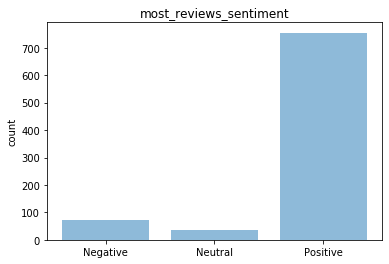

('Negative', 'Neutral', 'Positive') [74, 36, 755]


In [12]:
#Then, we created a new data set where we dropped all rows that contain null values. 
#And for each app, we calculated the number of each positive, negative and neutral review. 
#And we count the number of each different review and it turns out that most of the reviews were positive.

sentimentColMostReviews=sentimentCol.groupby(['most_reviews'],as_index = False).count()
del sentimentColMostReviews['Negative']
del sentimentColMostReviews['Neutral']
del sentimentColMostReviews['Positive']

mostReviewsArray=sentimentColMostReviews['most_reviews'].unique().tolist()
countArray=sentimentColMostReviews['App'].unique().tolist()
displayBarChart(mostReviewsArray,countArray,"most_reviews_sentiment")

In [13]:
#After that, we tried to derive sentiment column from the Sentiment Polarity column. 
#First, we calculated the range of sentiment polarity for each type of review (positive, negative or neutral) 
#and we got the min and max values of sentiment polarity for them.


newData=pd.read_csv("google-play-store-apps/googleplaystore_user_reviews.csv") 
newData.dropna(inplace = True) 
newData.to_csv("google-play-store-apps/userReviewsNoMissingValues.csv")

sentimentColMin=newData.groupby('Sentiment',as_index = False).min()
sentimentColMax=newData.groupby('Sentiment',as_index = False).max()
del sentimentColMin['App']
del sentimentColMax['App']
del sentimentColMin['Translated_Review']
del sentimentColMax['Translated_Review']
del sentimentColMin['Sentiment_Subjectivity']
del sentimentColMax['Sentiment_Subjectivity']
sentimentColMin.rename(columns={'Translated_Review' : 'count'},inplace=True)
#sentimentCol.rename(columns={'Translated_Review' : 'count'},inplace=True)

df_row = pd.merge(sentimentColMin, sentimentColMax, how='inner',on='Sentiment')
df_row.rename(columns={'Sentiment_Polarity_x' : 'min'},inplace=True)
df_row.rename(columns={'Sentiment_Polarity_y' : 'max'},inplace=True)


print(df_row)
print()
print("we can derive sentiment column from Sentiment_Polarity column")
print("Negative sentiment has range of negative Sentiment_Polarity values")
print("Positive sentiment has range of positive Sentiment_Polarity values")
print("Neutral sentiment has only zero Sentiment_Polarity values")



  Sentiment           min           max
0  Negative -1.000000e+00 -2.523234e-18
1   Neutral  0.000000e+00  0.000000e+00
2  Positive  5.551115e-18  1.000000e+00

we can derive sentiment column from Sentiment_Polarity column
Negative sentiment has range of negative Sentiment_Polarity values
Positive sentiment has range of positive Sentiment_Polarity values
Neutral sentiment has only zero Sentiment_Polarity values


In [14]:
#After that, we calculated the mean of each positive, negative and neutral Sentiment Polarity for each app 
#and we did the same for Sentiment Subjectivity.

newData=pd.read_csv("google-play-store-apps/googleplaystore_user_reviews.csv") 
newData.dropna(inplace = True) 
newData.to_csv("google-play-store-apps/userReviewsNoMissingValues.csv")

sentimentColSubjective=newData.groupby(['App','Sentiment'],as_index = False).mean()

sentimentColSubjective = sentimentColSubjective.pivot_table(index=["App"], columns="Sentiment", values=["Sentiment_Polarity","Sentiment_Subjectivity"])
sentimentColSubjective.reset_index(drop=False, inplace=True)

sentimentColSubjective.columns = ['App','NEPM','NPM','PPM','NESM','NSM','PSM']
sentimentColSubjective = sentimentColSubjective[['App','PPM','PSM','NPM','NSM','NEPM','NESM']]

tupleArray=[('App','Application'),
('PPM','Positive Polarity Mean'),
('NPM','Neutral Polarity Mean'),
('NEPM','Negative Polarity Mean'),
('PSM','Positive Subjective Mean'),
('NSM','Neutral Subjective Mean'),
('NESM','Negative Subjective Mean')]

for tuple in tupleArray:
    print(tuple)

sentimentColSubjective


('App', 'Application')
('PPM', 'Positive Polarity Mean')
('NPM', 'Neutral Polarity Mean')
('NEPM', 'Negative Polarity Mean')
('PSM', 'Positive Subjective Mean')
('NSM', 'Neutral Subjective Mean')
('NESM', 'Negative Subjective Mean')


,App,PPM,PSM,NPM,NSM,NEPM,NESM
0,10 Best Foods for You,0.588717,0.571409,0.0,0.000000,-0.405000,0.355000
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.509958,0.680594,0.0,0.012500,-0.112500,0.622222
2,11st,0.417695,0.581550,0.0,0.148148,-0.336458,0.435615
3,1800 Contacts - Lens Store,0.416171,0.693858,0.0,0.071429,-0.197222,0.361111
4,1LINE – One Line with One Touch,0.397821,0.625860,0.0,0.000000,-0.410268,0.534970
5,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.607444,0.615667,0.0,0.061111,-0.800000,0.900000
6,21-Day Meditation Experience,0.318466,0.528847,0.0,0.850000,-0.101458,0.642222
7,"2Date Dating App, Love and matching",0.502837,0.679625,0.0,0.000000,-0.346230,0.506944
8,2GIS: directory & navigator,0.435801,0.489088,0.0,0.181818,-0.183042,0.436217
9,2RedBeans,0.553788,0.694131,0.0,0.059524,-0.545833,0.720833


In [15]:
#In the end, we tried to get the reviews that had low Sentiment Subjectivity for the apps 
# because low Sentiment Subjectivity means that the review was more of a fact than a personal opinion. 
# We did to see the number of positive and negative reviews 
# that weren’t just a personal opinion about the app.

# data table 
newData=pd.read_csv("google-play-store-apps/googleplaystore_user_reviews.csv") 
newData.dropna(inplace = True) 
newData.to_csv("google-play-store-apps/userReviewsNoMissingValues.csv")
newData['Sentiment_Subjectivity'] = newData['Sentiment_Subjectivity'].astype(float)
reviewColAnalysis=newData.loc[(newData['Sentiment_Subjectivity'] < 0.2) &   (newData['Sentiment']!='Neutral')]
del reviewColAnalysis['Sentiment_Polarity']
reviewColAnalysis.to_csv('google-play-store-apps/reviewColAnalysis.csv')
reviewColAnalysis

,App,Translated_Review,Sentiment,Sentiment_Subjectivity
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.100000
18,10 Best Foods for You,Very Useful in diabetes age 30. I need control...,Positive,0.100000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,0.000000
44,10 Best Foods for You,Best thing I lost ten lbs. two months help tips,Positive,0.150000
48,10 Best Foods for You,A big thanks ds I got bst gd health,Positive,0.150000
58,10 Best Foods for You,Very useful,Positive,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,0.000000
111,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.100000
118,10 Best Foods for You,Very Useful in diabetes age 30. I need control...,Positive,0.100000
143,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,0.000000
